# x0 cut prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

## Loading the data

In [2]:
doe = pd.read_csv('../data/doe.csv')
doe

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [3]:
# Load the data using pandas
data = pd.read_csv('../data/cut_x0_all.csv')
data.drop(data[data.doe_id == 1000].index, inplace=True)
data.drop(data[data.doe_id == 247].index, inplace=True)
data

,doe_id,y,z,x,t,deviation,target_idx,y_d,z_d,x_d,t_d,c,color,deviationc,Ziehtiefe,part,tp
0,1,-94.864250,0.50,0.0,0.000000,0.543273,9,-94.855233,1.043198,0.0,0.000900,1.0,r,0.543273,30,lu,0.000000
1,1,-94.621034,0.50,0.0,0.001001,0.541849,19,-94.616495,1.041830,0.0,0.001900,1.0,r,0.541849,30,lu,0.004115
2,1,-94.377819,0.50,0.0,0.002002,0.540459,29,-94.377757,1.040459,0.0,0.002900,1.0,r,0.540459,30,lu,0.008230
3,1,-94.134603,0.50,0.0,0.003003,0.539104,39,-94.139019,1.039086,0.0,0.003900,1.0,r,0.539104,30,lu,0.012346
4,1,-93.891387,0.50,0.0,0.004004,0.537783,50,-93.876407,1.037574,0.0,0.005001,1.0,r,0.537783,30,lu,0.016461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879995,999,94.042937,0.75,0.0,0.995996,3.680685,9899,93.789254,4.421933,0.0,0.989999,1.0,cyan,3.680685,30,ru,4.983539
879996,999,94.286153,0.75,0.0,0.996997,3.697178,9909,94.028139,4.438164,0.0,0.990999,1.0,cyan,3.697178,30,ru,4.987654
879997,999,94.529369,0.75,0.0,0.997998,3.713665,9919,94.267024,4.454387,0.0,0.991999,1.0,cyan,3.713665,30,ru,4.991769
879998,999,94.772584,0.75,0.0,0.998999,3.730136,9930,94.529798,4.472227,0.0,0.993099,1.0,cyan,3.730136,30,ru,4.995885


## Creating the regressor

In [4]:
from cut_predictor import CutPredictor

reg = CutPredictor()
reg.load_data(
    doe = doe,
    data = data,
    index='doe_id',
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    categorical = [
        'Ziehspalt', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    position = 'tp',
    output = ['deviationc', 'y', 'z']
)

In [5]:
# Print a summary of the data
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Stempel_ID : categorical [2, 3]
Input variables:
	- tp : numerical, [ 0.0 / 5.0 ] 
Output variable(s):
	- deviationc : numerical, [ -3.16506211149574 / 7.228601057768613 ]
	- y : numerical, [ -94.86425 / 95.0158 ]
	- z : numerical, [ 0.483866215444952 / 70.76854729051487 ]

Inputs
------------------------------------------------------------

(879000, 11)

Outputs
------------------------------------------------------------

(879000, 3)


## Training methods

### Autotuning

In [ ]:
best_config = reg.autotune(
    save_path='models/best_x0_model',
    trials=100,
    max_epochs=20, 
    layers=[4, 6],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)

In [ ]:
reg.training_summary()

### Alternative: define a custom network and do the optimization yourself

One can also run the autotuning for a limited number of epochs and then fine-tune the best configuration by training it longer.

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0         
                                         

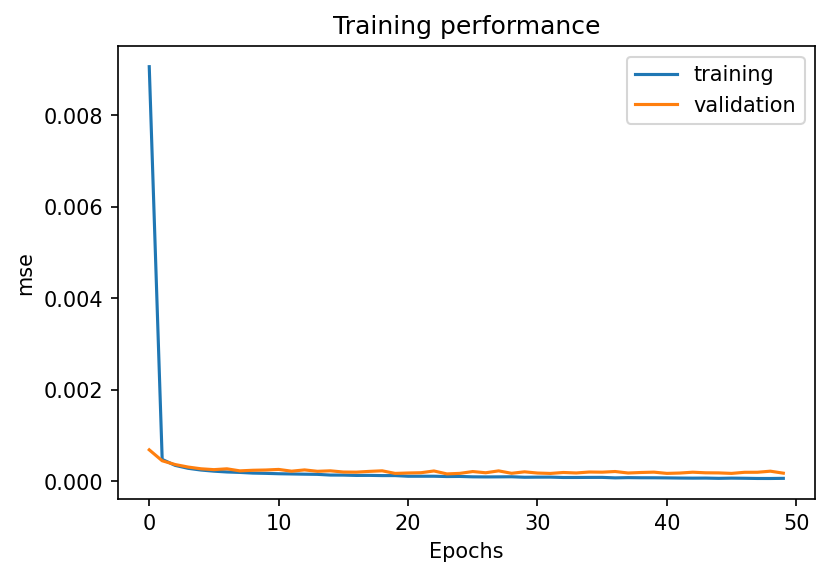

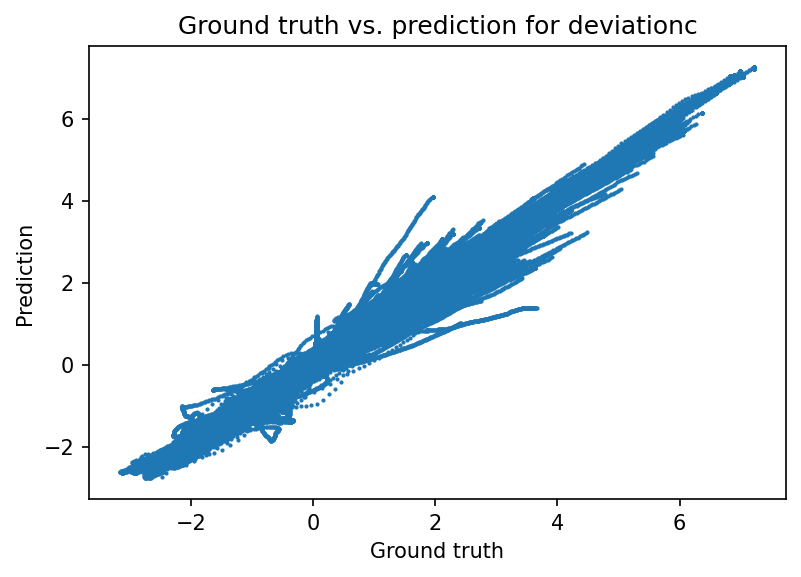

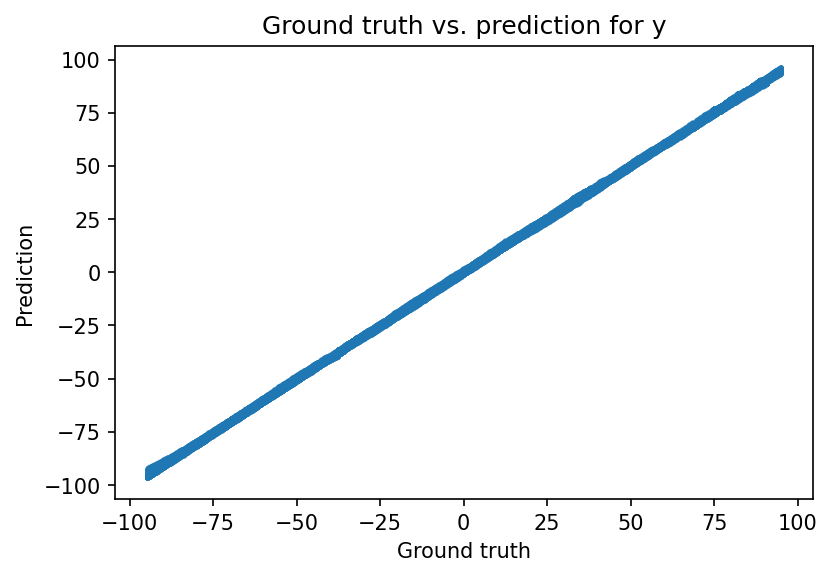

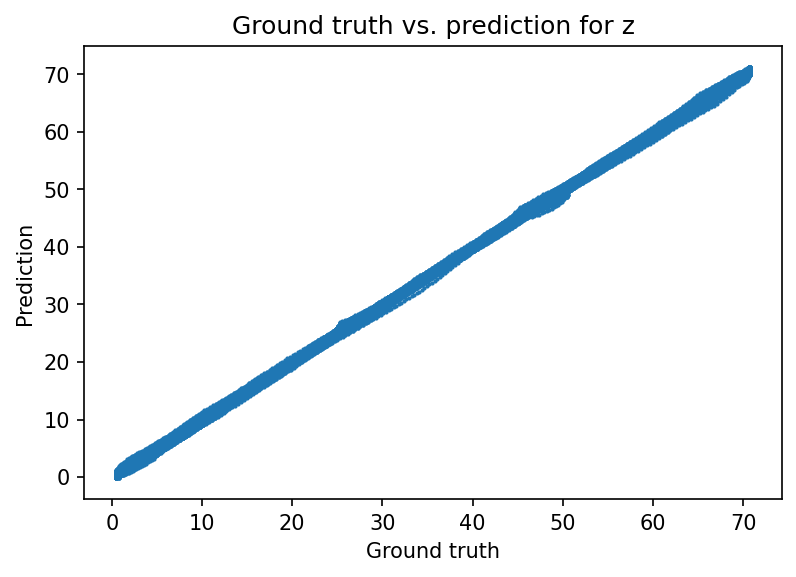

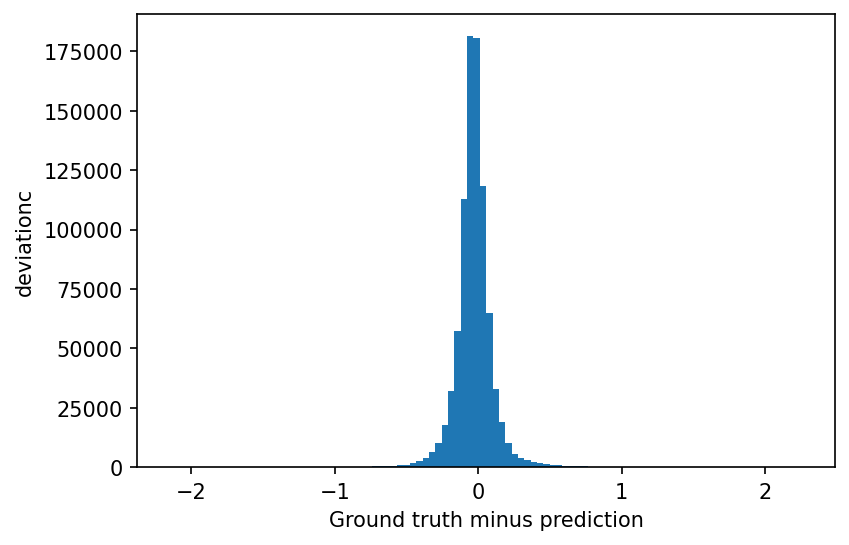

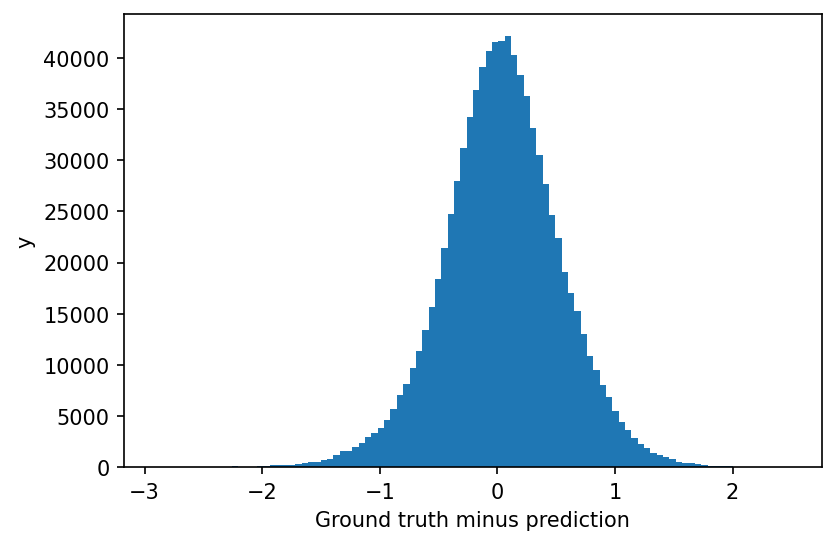

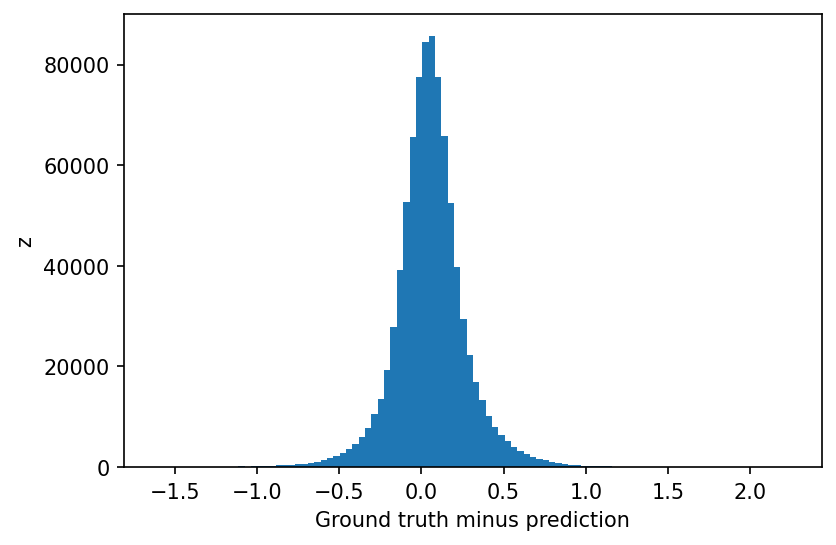

In [6]:
config = {
    'batch_size': 4096,
    'max_epochs': 50,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.001
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='models/best_x0_model', config=config, verbose=True)
reg.training_summary()

### Other alternative: the model has already been trained

We just need to reload it to make predictions.

In [7]:
reg.load_network(load_path='models/best_x0_model')

## Visualization

### Prediction for single process parameter values

Text(0, 0.5, 'z')

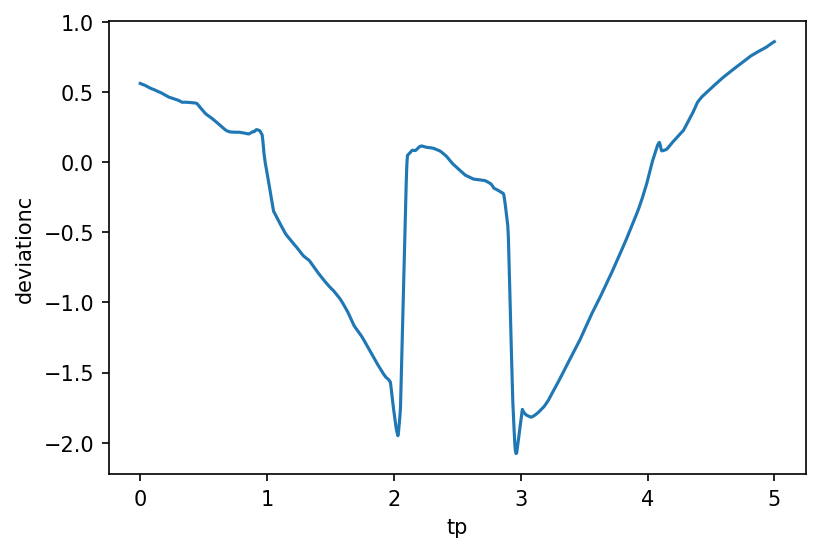

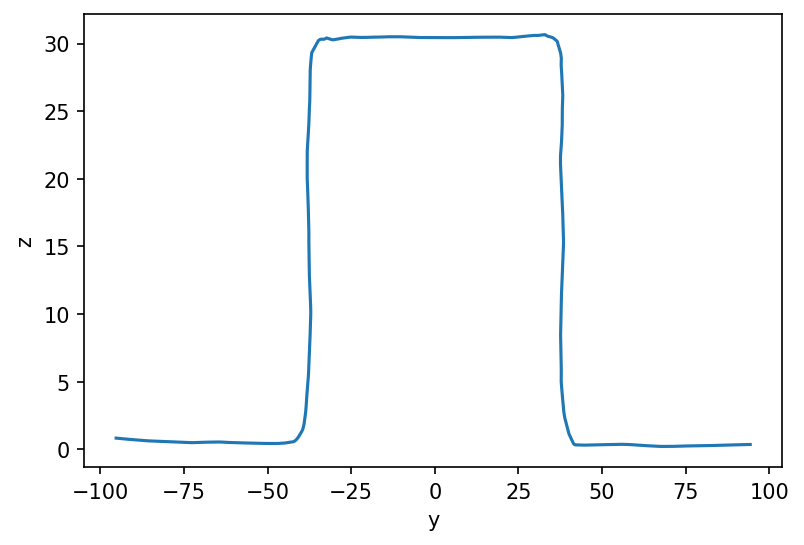

In [8]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 410.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 138.22696,
        'Rp50': 449.528189,
    }, 
    positions=1000)

plt.figure()
plt.plot(x, y[:, 0])
plt.xlabel('tp')
plt.ylabel('deviationc')


plt.figure()
plt.plot(y[:, 1], y[:, 2])
plt.xlabel('y')
plt.ylabel('z')

## Comparison with the ground truth on the training set

Randomly choose an id between 1 and 1000 and compare the prediction to the ground truth. If the experiment does not exist in the data, an error will be thrown.

Doe_ID 215


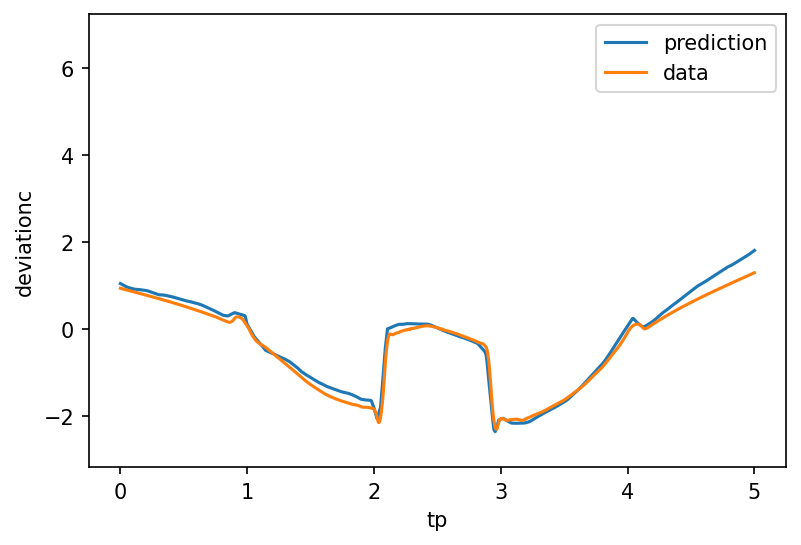

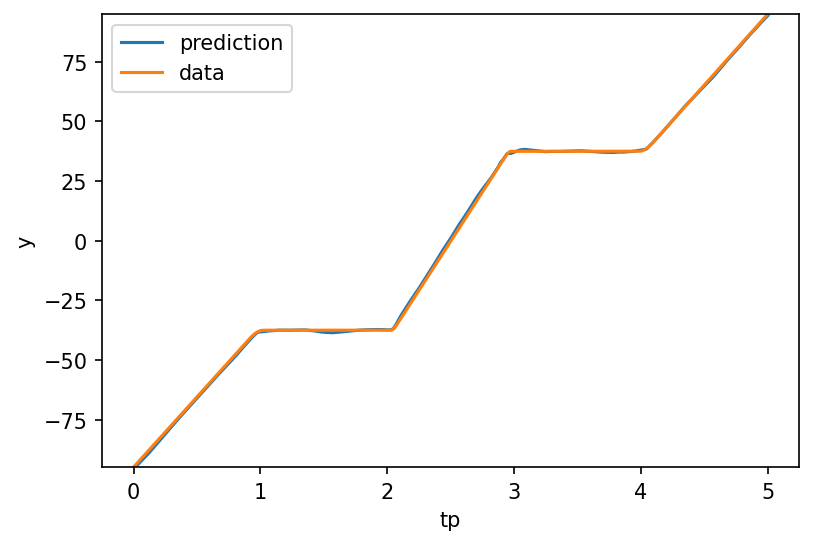

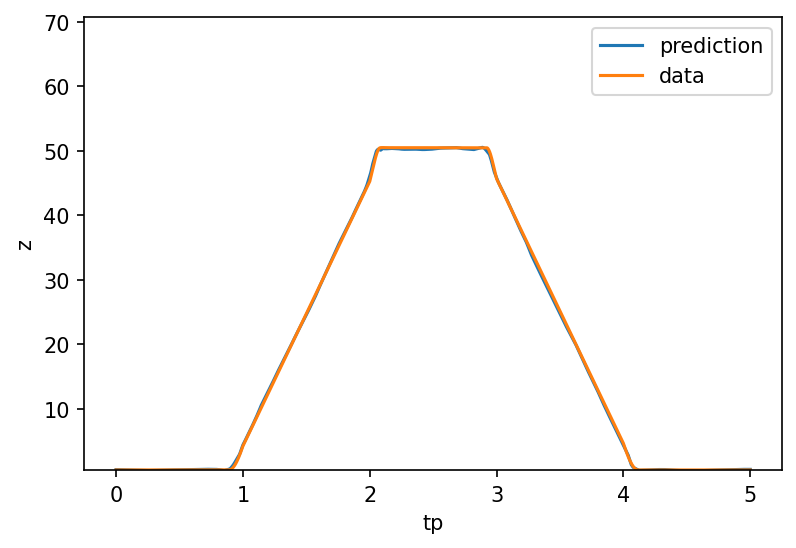

In [9]:
idx = np.random.choice(1000) + 1
print("Doe_ID", idx)
reg.compare(idx)

In [10]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def viz(x, y):
    plt.figure()
    plt.plot(x, y[:, 0])
    plt.xlabel('tp')
    plt.ylabel('deviationc')


    plt.figure()
    plt.plot(y[:, 1], y[:, 2])
    plt.xlabel('y')
    plt.ylabel('z')

reg.interactive(function=viz, positions=100)

interactive(children=(FloatSlider(value=1.1883700000000001, description='Blechdicke', max=1.48, min=0.99, step…